In [1]:
import warnings 
warnings.filterwarnings('ignore')

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import pandas as pd
import random
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

dataset = pd.read_csv("bank.csv")

dataset.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6408,6409,15738497,Chukwujamuike,729,Spain,Male,44,4,107726.93,2,1,0,153064.87,0
7853,7854,15746674,Miller,730,France,Female,47,7,0.00,1,1,0,33373.26,1
9209,9210,15570681,Chiang,560,France,Male,24,1,116084.32,1,1,0,89734.70,0
334,335,15742668,Day,626,Spain,Female,37,6,108269.37,1,1,0,5597.94,0
8124,8125,15733872,Marino,791,Germany,Female,33,10,130229.71,2,0,0,54019.93,1
5680,5681,15803947,Teng,757,Germany,Female,30,6,161378.02,1,0,0,71926.28,1
1460,1461,15657085,Gardiner,578,France,Male,23,10,88980.32,1,1,1,125222.36,0
8743,8744,15746035,Pagnotto,450,Spain,Male,25,9,74237.20,2,0,1,195463.35,0
111,112,15665790,Rowntree,538,Germany,Male,39,7,108055.10,2,1,0,27231.26,0
9427,9428,15584812,Overby,693,Spain,Female,39,0,0.00,2,0,0,81901.60,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
dataset = dataset.drop('CustomerId', axis=1)

In [5]:
dataset = dataset.drop('RowNumber', axis=1)

In [6]:
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [8]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
dataset.isnull().any()

Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB38C50>,
      dtype=object)

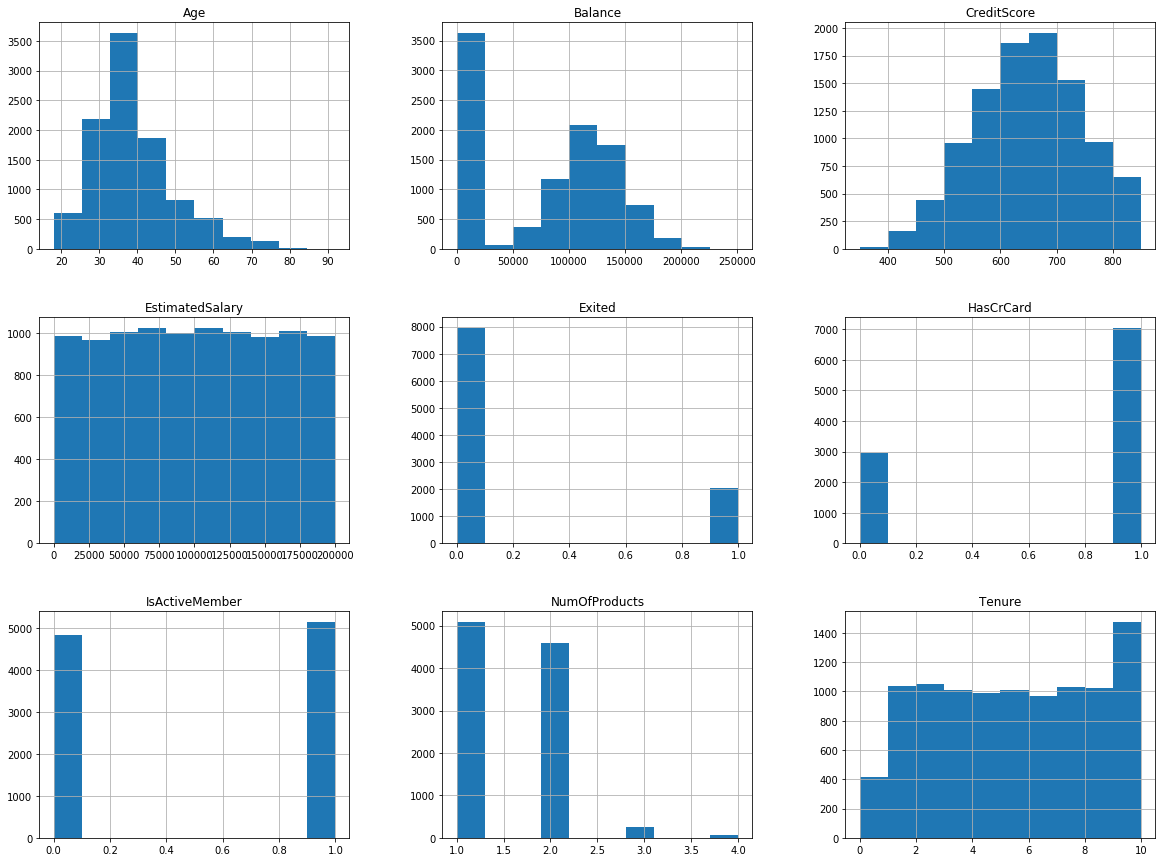

In [10]:
num_bins=10
dataset.hist(bins=num_bins, figsize=(20,15))

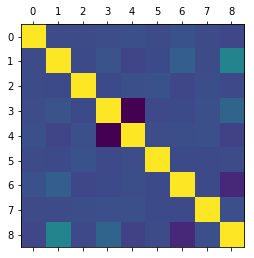

In [11]:
import matplotlib.pyplot as plt
plt.matshow(dataset.corr())

In [12]:
dataset.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


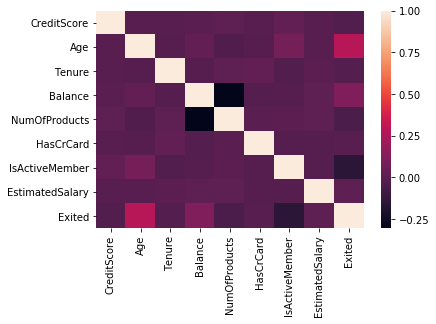

In [13]:
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

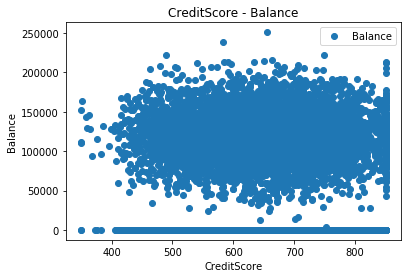

In [14]:
dataset.plot(x='CreditScore', y='Balance', style='o')  
plt.title('CreditScore - Balance')  
plt.xlabel('CreditScore')  
plt.ylabel('Balance')  
plt.show()

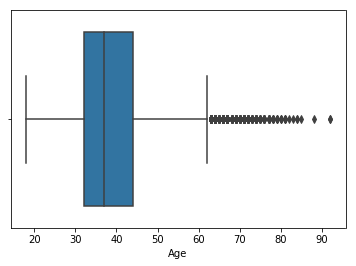

In [15]:
import seaborn as sns
sns.boxplot(x=dataset['Age'])

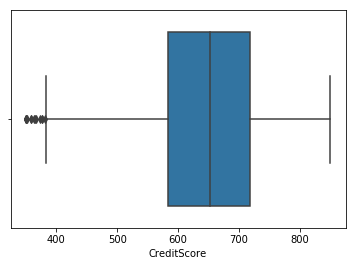

In [16]:
sns.boxplot(x=dataset['CreditScore'])

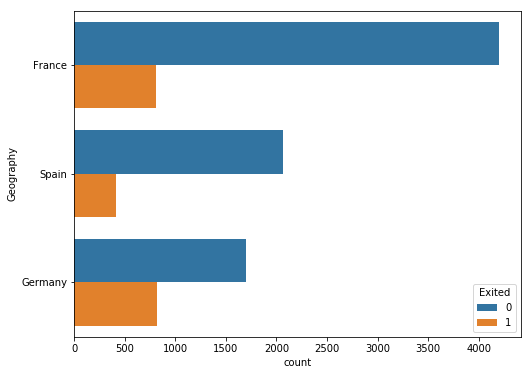

In [17]:
import seaborn as sb
from itertools import chain
countmale = dataset[dataset['Gender']=='Male']['Gender'].count()
countfemale=dataset[dataset['Gender']=='Female']['Gender'].count()    
fig,aix = plt.subplots(figsize=(8,6))
#print(countmale)
#print(countfemale)
aix = sb.countplot(hue='Exited',y='Geography',data=dataset)

In [18]:
cal= dataset[dataset['IsActiveMember']==1].count()
cal2 = dataset[dataset['Exited']==1].count()
ave = (cal2/(cal+cal2))*100
va= '%.1f '  % ave[1]
print(va+'%')

28.3 %


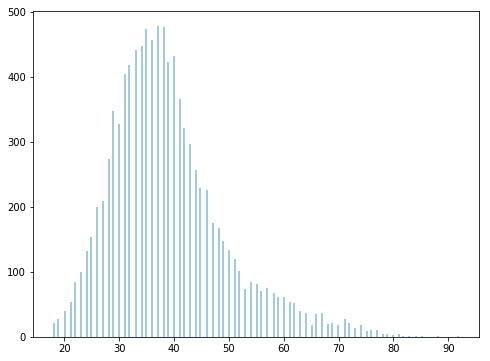

In [19]:
age = np.array(dataset['Age'])
fig,axis = plt.subplots(figsize=(8,6))
axis = sb.distplot(age,kde=False,bins=200)

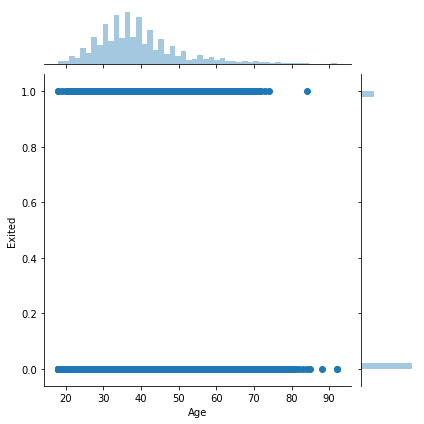

In [20]:
axis = sb.jointplot(x='Age',y='Exited',data = dataset)

In [21]:
#we are seeing that the clients is more between 30 to 50 we are having more clients in this range.

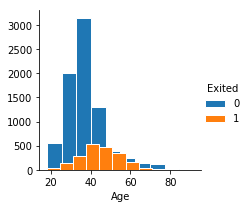

In [22]:
g = sb.FacetGrid(dataset,hue = 'Exited')
(g.map(plt.hist,'Age',edgecolor="w").add_legend())

In [23]:
array1 = np.array(dataset['IsActiveMember'])
array2 = np.array(dataset['Exited'])
index = len(array1)
count = 0
for i in range(index):
    if(array1[i]==1 and array2[i]==1):
        count +=1
print(count)

735


In [26]:
dataset.shape

(10000, 12)

In [28]:
x = dataset.iloc[:, 1:11]
y = dataset.iloc[:, 11]

In [29]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
x.iloc[:, 1] = labelencoder_x.fit_transform(x.iloc[:, 1]) #applying on Geography
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [31]:
#apply encoder on Gender as well
labelencoder_x_2 = LabelEncoder()
x.iloc[:, 2] = labelencoder_x_2.fit_transform(x.iloc[:, 2]) #applying on Gender
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [32]:
#One hot encoding. 

from keras.utils import to_categorical
encoded = pd.DataFrame(to_categorical(x.iloc[:, 1]))
#no need to encode Gender, as there are only two categories

x = pd.concat([encoded, x], axis = 1)
x.head()

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


,0,1,2,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10


In [33]:
from keras.layers import Dense
from keras.models import Sequential

In [34]:
#Dropping the existing "geography" category, and one of the onehotcoded columns.

x = x.drop(['Geography', 0], axis = 1)
x.head()

,1,2,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10


In [35]:
#train and test set split, and feature scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense #to add layers

#there is no rule on how many nodes each hidden layer should have
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
#init --> initialize weights according to uniform distribution
#input_dim is required for the first hidden layer, as it is the first starting point. --> number of nodes.
#output_dim --> number of nodes of the hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  import sys
C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [37]:
#input_dim --> remove it as it already knows what to expect.

#the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
#output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
#If dependent variables have more than two categories, use activation = 'softmax'

#compile the model --> backpropagation -> gradient descent
classifier.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized. if more than two categories, use "categorical_crossentropy"
#metrics = criterion used to calculate the performance of the model.

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [38]:
classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 20)
#batch_size = the number of observations after which you want to update the weights
#           batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset

Instructions for updating:
Use tf.cast instead.


C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
8000/8000 [==============================] - 1s 179us/step - loss: 0.4944 - acc: 0.7957
Epoch 2/20
8000/8000 [==============================] - 1s 110us/step - loss: 0.4284 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 1s 111us/step - loss: 0.4231 - acc: 0.7960
Epoch 4/20
8000/8000 [==============================] - 1s 111us/step - loss: 0.4196 - acc: 0.8126
Epoch 5/20
8000/8000 [==============================] - 1s 110us/step - loss: 0.4169 - acc: 0.8244
Epoch 6/20
8000/8000 [==============================] - 1s 109us/step - loss: 0.4153 - acc: 0.8284
Epoch 7/20
8000/8000 [==============================] - 1s 107us/step - loss: 0.4137 - acc: 0.8300
Epoch 8/20
8000/8000 [==============================] - 1s 112us/step - loss: 0.4120 - acc: 0.8321
Epoch 9/20
8000/8000 [==============================] - 1s 110us/step - loss: 0.4115 - acc: 0.8337
Epoch 10/20
8000/8000 [==============================] - 1s 142us/step - loss: 0.4102 - acc: 0.8337
Epoch 11/

In [39]:
#predicting the results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) #to classify each probability into True or False

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print (cm, '\n\n', y_pred[:5, :])

[[1555   40]
 [ 277  128]] 

 [[False]
 [False]
 [False]
 [False]
 [False]]


In [40]:
#accuracy
print ((1548 + 139)/2000)

0.8435
